In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.autograd as tgrad
import torch.nn.functional as F


import os
import time
import tqdm
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from timeit import default_timer as timer

import importlib
import utils
import networks

In [2]:
# extract data
loss_list = pd.read_csv('Thesis/pinn_average_losses.csv')['Average_MSE_Loss'].to_numpy()
# .to_numpy()
loss_list2 = pd.read_csv('Thesis/ipinn_average_losses.csv')['Average_MSE_Loss'].to_numpy()
loss_list4 = pd.read_csv('Thesis/awpinn_average_losses_-3.csv')['Average_MSE_Loss'].to_numpy()
loss_list5 = pd.read_csv('Thesis/awipinn_average_losses_-3.csv')['Average_MSE_Loss'].to_numpy()
# loss_list6 = pd.read_csv('Thesis/nn_loss.csv').to_numpy()
print('Done')
print(loss_list.shape)
print(loss_list2.shape)
print(loss_list4.shape)
print(loss_list5.shape)

Done
(10000,)
(10000,)
(10000,)
(10000,)


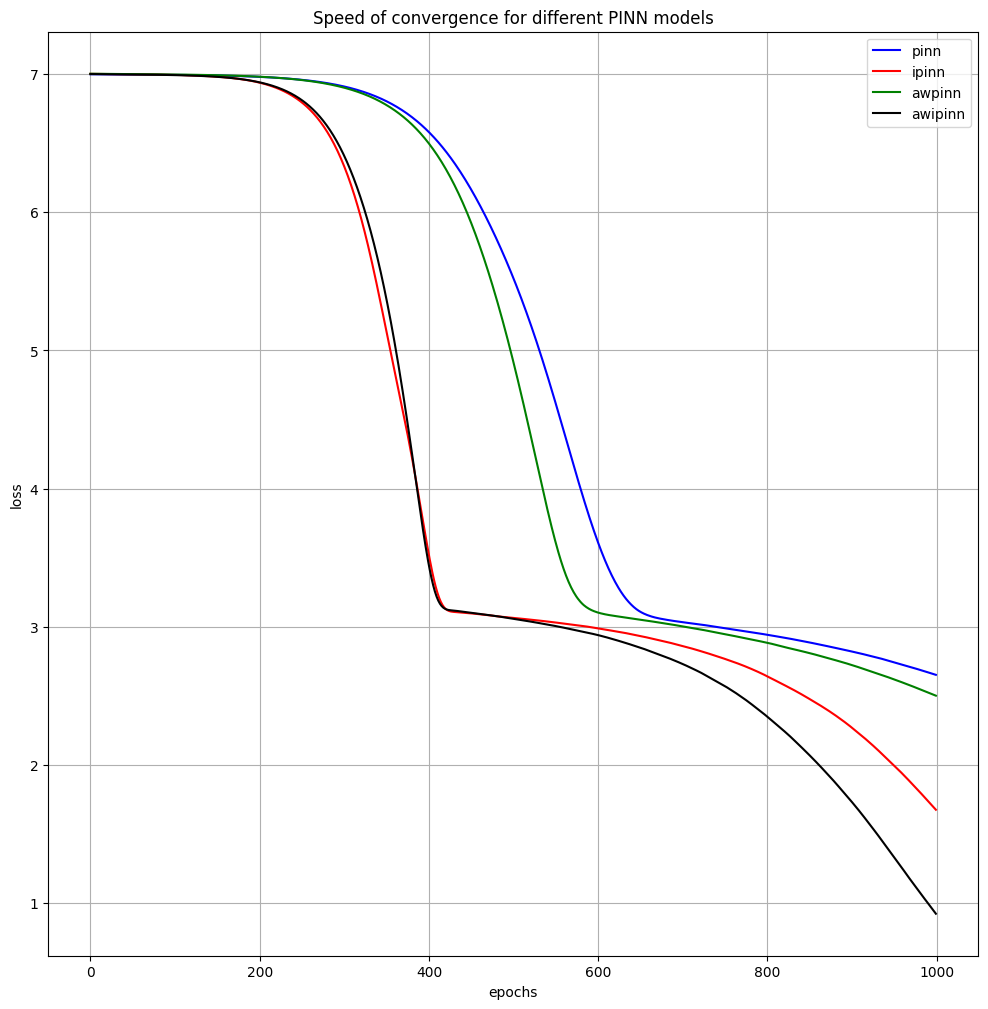

In [3]:
fig = plt.figure(figsize=(12,12))
plt.plot(range(1000), [np.log(item) for item in loss_list[:1000]], color='blue', label='pinn')
plt.plot(range(1000), [np.log(item) for item in loss_list2[:1000]], color='red', label='ipinn')
plt.plot(range(1000), [np.log(item) for item in loss_list4[:1000]], color='green', label='awpinn')
plt.plot(range(1000), [np.log(item) for item in loss_list5[:1000]], color='black', label='awipinn')
# plt.plot(range(1000), [np.log(item) for item in loss_list6[:1000]], color='cyan', label='fnn')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title(f'Speed of convergence for different PINN models')
plt.grid(True)

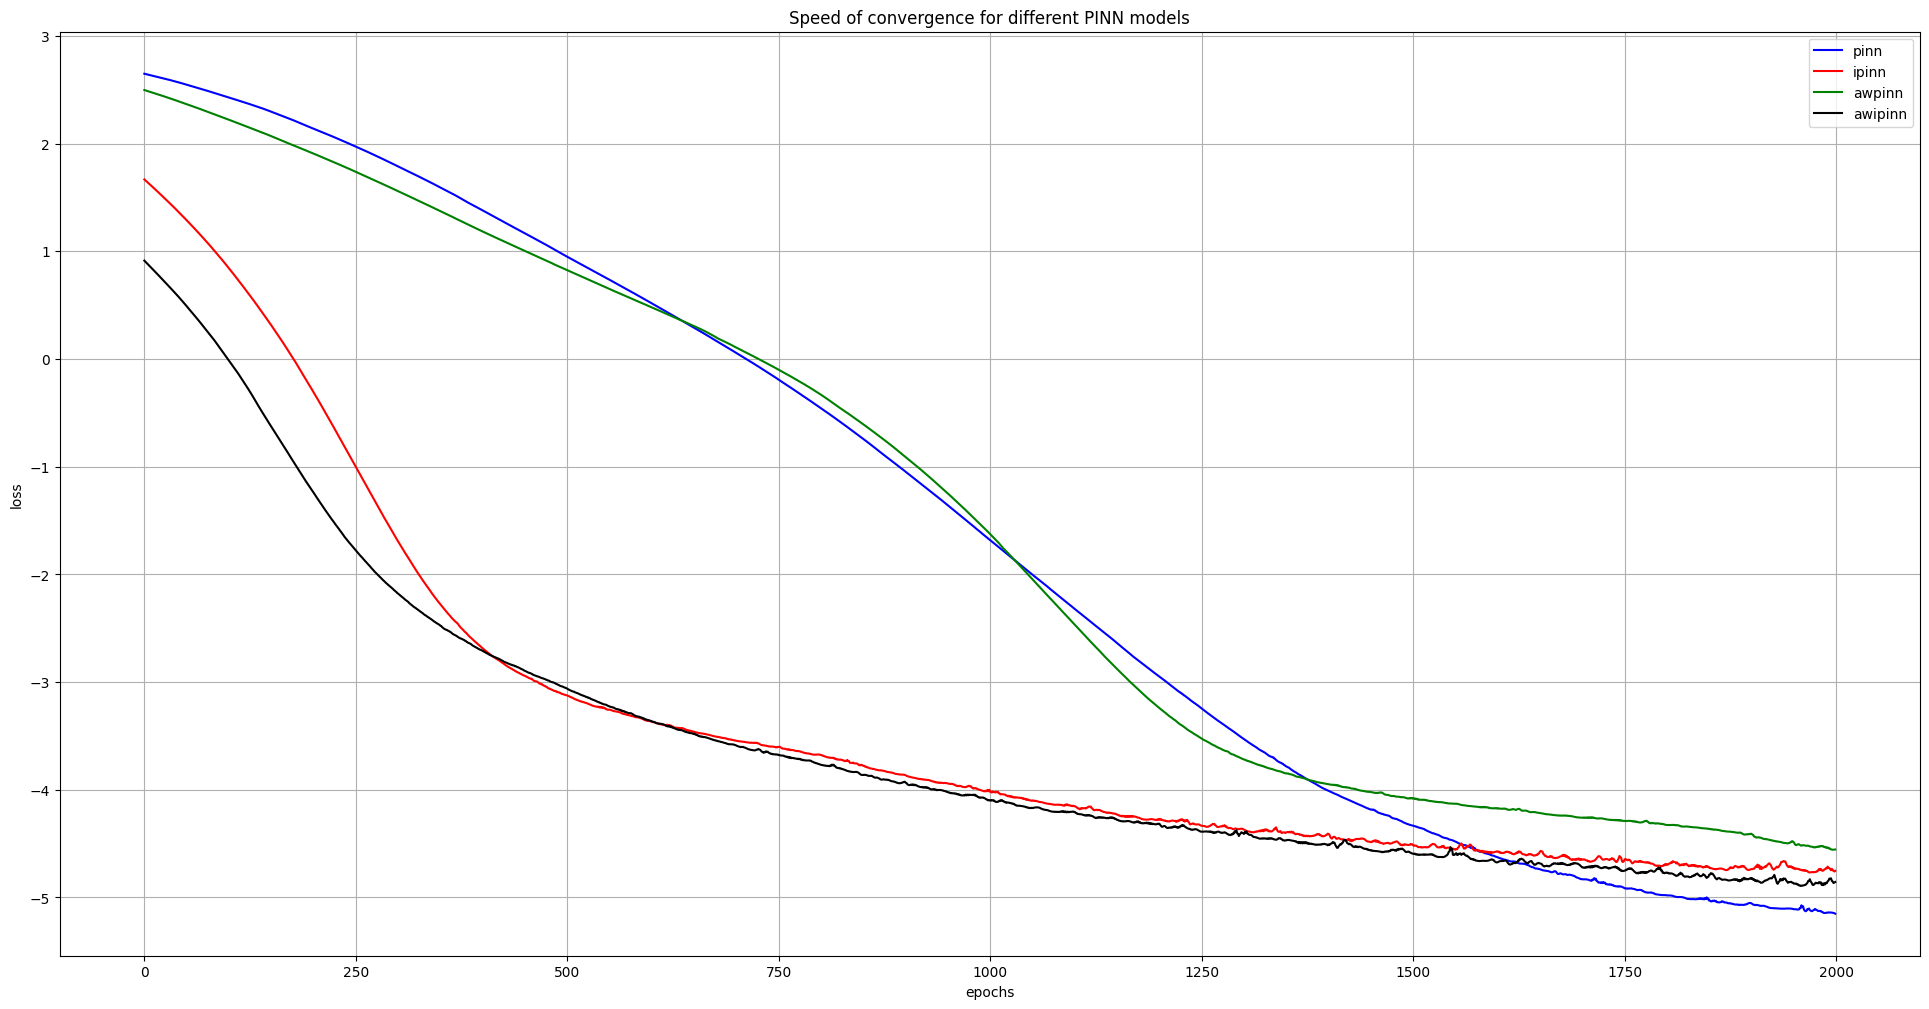

In [4]:
fig = plt.figure(figsize=(24,12))
plt.plot(range(2000), [np.log(item) for item in loss_list[1000:3000]], color='blue', label='pinn')
plt.plot(range(2000), [np.log(item) for item in loss_list2[1000:3000]], color='red', label='ipinn')
plt.plot(range(2000), [np.log(item) for item in loss_list4[1000:3000]], color='green', label='awpinn')
plt.plot(range(2000), [np.log(item) for item in loss_list5[1000:3000]], color='black', label='awipinn')
# plt.plot(range(2000), [np.log(item) for item in loss_list6[1000:3000]], color='cyan', label='fnn')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title(f'Speed of convergence for different PINN models')
plt.grid(True)

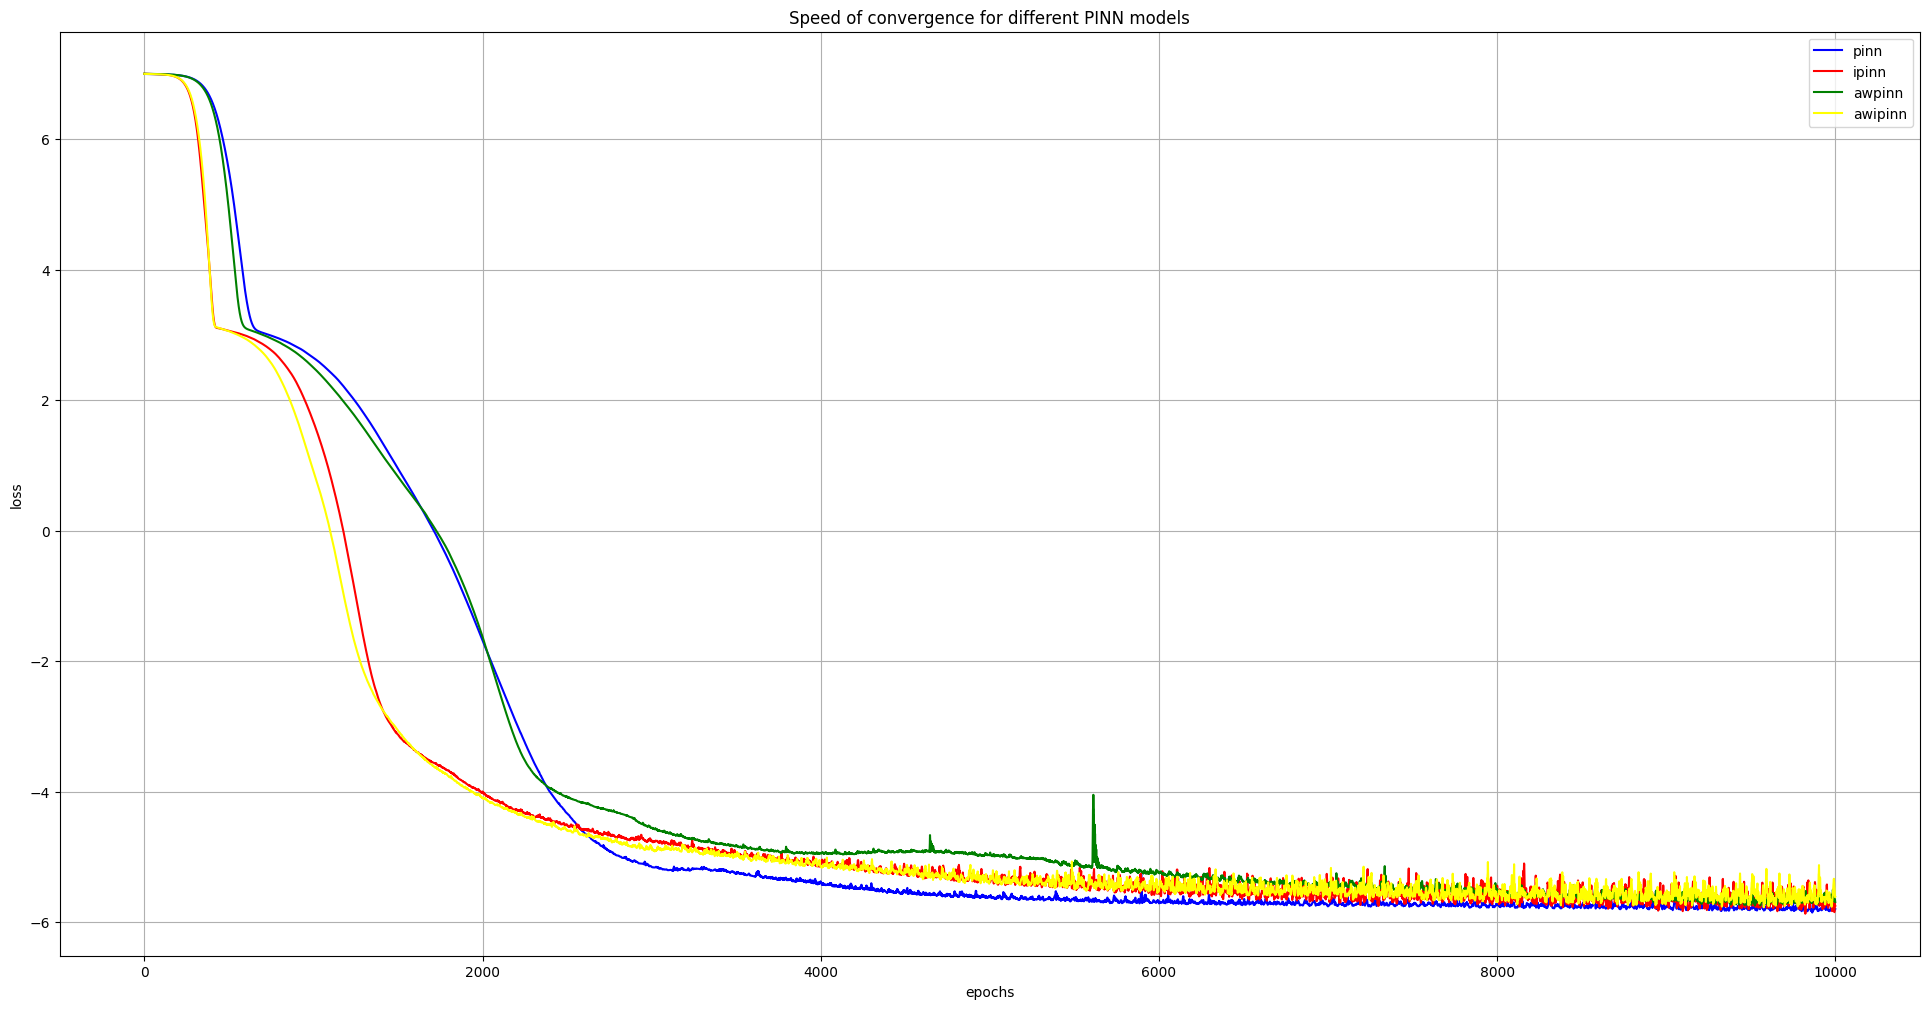

In [5]:
fig = plt.figure(figsize=(24,12))
plt.plot(range(10000), [np.log(item) for item in loss_list[:10000]], color='blue', label='pinn')
plt.plot(range(10000), [np.log(item) for item in loss_list2[:10000]], color='red', label='ipinn')
plt.plot(range(10000), [np.log(item) for item in loss_list4[:10000]], color='green', label='awpinn')
plt.plot(range(10000), [np.log(item) for item in loss_list5[:10000]], color='yellow', label='awipinn')
# plt.plot(range(10000), [np.log(item) for item in loss_list6[:10000]], color='cyan', label='fnn')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title(f'Speed of convergence for different PINN models')
plt.grid(True)

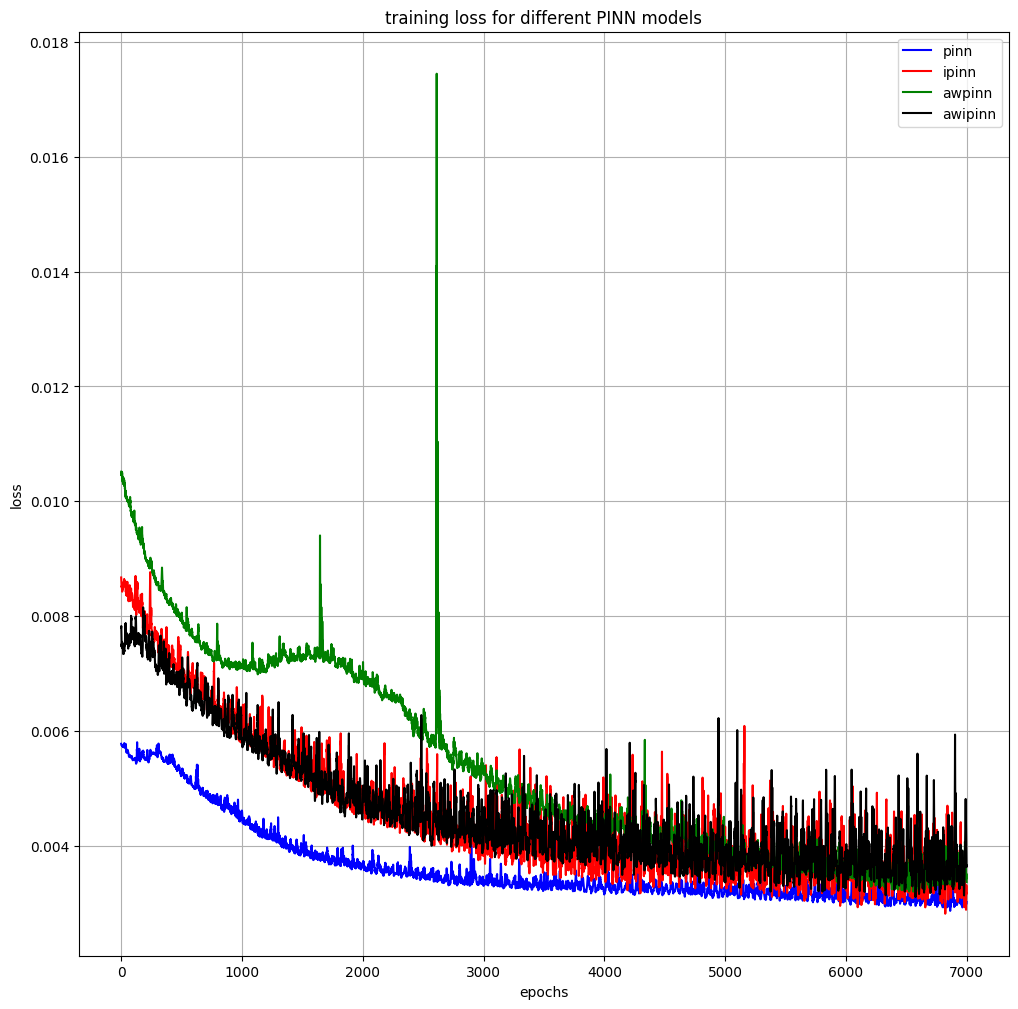

In [6]:
fig = plt.figure(figsize=(12,12))
plt.plot(range(7000), loss_list[3000:], color='blue', label='pinn')
plt.plot(range(7000), loss_list2[3000:], color='red', label='ipinn')
plt.plot(range(7000), loss_list4[3000:], color='green', label='awpinn')
plt.plot(range(7000), loss_list5[3000:], color='black', label='awipinn')
# plt.plot(range(17000), loss_list6[3000:], color='cyan', label='fnn')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title(f'training loss for different PINN models')
plt.grid(True)